## Modulo designado para la creación de el modelo de Random Forest sin PCA
En este punto los datasets ya se encuentran en archivos .csv dentro de la carpeta
"CSV ready to model"


In [1]:
import pandas as pd
from scikitplot.metrics import plot_roc, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import sys
import qgrid #Este paquete toca instalarlo o f
sys.path.append('..')
from funciones import classification_error,grafica_roc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')

Label encoder para la columna a predecir

In [2]:
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD','PERIODO'],axis=1)


In [3]:
def model_RF(x,y,estimadores, caracteristicas, impresion = False):

    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)

    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)


    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=RF,Xtest=Xtest,Ytest=Ytest)

    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
        'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
        'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
        'F':np.mean(f_list),'Int_F':np.std(f_list),
        'Error':np.mean(errores),'Int_Error':np.std(errores),
        'Tiempo':time.time()-tiempo_i
        }
    return  result

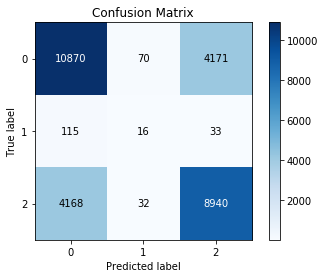

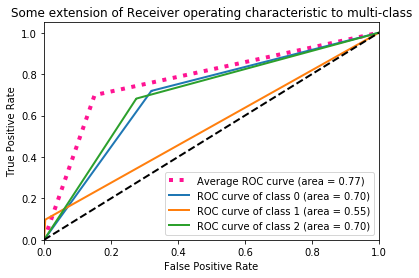

In [4]:
result= model_RF(x=x,y=y,estimadores=1,caracteristicas= 1, impresion = True)

In [5]:
print(result)

{'Eficiencia': 0.6847087805736407, 'Int_Eficiencia': 0.014095799613787043, 'Sensibilidad': 0.5166396896633588, 'Int_Sensibilidad': 0.24301557530580722, 'Precisión': 0.5241347661175818, 'Int Precisión': 0.23135605853988025, 'F': 0.5197733790745748, 'Int_F': 0.23790146108056867, 'Error': 0.3152912194263593, 'Int_Error': 0.014095799613787052, 'Tiempo': 1.9172980785369873}


In [6]:
pd.options.mode.chained_assignment = None
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,
                                     10,10,10,10,10,
                                     20,20,20,20,20,
                                     50,50,50,50,50,
                                     100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""

df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    result = model_RF(x,y,n, k, impresion = False)
    df_types["Eficiencia"][n,k] = result['Eficiencia']
    df_types["Int_Eficiencia"][n,k] = result['Int_Eficiencia']
    df_types["Sensibilidad"][n,k] = result['Sensibilidad']
    df_types["Int_Sensibilidad"][n,k] = result['Int_Sensibilidad']
    df_types["Precision"][n,k] = result['Precisión']
    df_types["Int_Precision"][n,k] = result['Precisión']
    df_types["F-Score"][n,k] = result['F']
    df_types["Int_F-Score"][n,k] = result['Int_F']
    df_types["Error_Prueba"][n,k] = result['Error']
    df_types["Int_error"][n,k] = result['Int_Error']
    df_types["Tiempo de ejecución"][n,k] = result['Tiempo']

#df_types.sort_index(inplace=True)


In [7]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…